<a href="https://colab.research.google.com/github/mohdnadeemece/Echo_Track_Waste_Managment_machine_learning/blob/main/Echo_Track_Waste_Managment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import seaborn as sns

In [3]:
df_all = pd.read_csv("/content/eid_ul_adha_waste_shahfaisal.csv")
print("✅ Loaded dataset with columns:", df_all.columns.tolist())

np.random.seed(42)
cells=["Zone-A","Zone-B","Zone-C"]

✅ Loaded dataset with columns: ['Location', 'Animal Type', 'Quantity (Animals)', 'Waste Type', 'Estimated Waste (kg)', 'Collection Status', 'Remarks']


In [4]:
def generate_dataset(cell_name, samples=100):
  data=[]

  for _ in range(samples):
    waste_type=np.random.choice(["remain","plastic","organic","mixed"])
    bins=np.histogram(np.random.rand(256)*255, bins=8, range=(0,255))[0]
    label= 1 if waste_type in ["remain","organic"] else 0
    data.append([cell_name]+ bins.tolist() + [label])
  return pd.DataFrame(data, columns=['Cell'] + [f'Bin{i}' for i in range(8)] + ['Urgent'])


df_zone_a=generate_dataset("Zone-A")
df_zone_b=generate_dataset("Zone-B")
df_zone_c=generate_dataset("Zone-C")
  # df_all=pd.concat([df_zone_a,df_zone_b,df_zone_c], ignore_index=True)
print("Columns in dataset:", df_all.columns.tolist())
df_all.head()


Columns in dataset: ['Location', 'Animal Type', 'Quantity (Animals)', 'Waste Type', 'Estimated Waste (kg)', 'Collection Status', 'Remarks']


,Location,Animal Type,Quantity (Animals),Waste Type,Estimated Waste (kg),Collection Status,Remarks
0,Shah Faisal Zone 5,Camel,26,Intestines,546.30,Pending,Need special vehicle
1,Shah Faisal Zone 4,Sheep,20,Intestines,300.80,Pending,Collection at 5 PM
2,Shah Faisal Zone 4,Goat,21,Blood & Internal,435.21,Collected,By private contractor
3,Shah Faisal Zone 5,Camel,16,Intestines,280.59,Pending,Need special vehicle
4,Shah Faisal Zone 2,Cow,6,Blood & Internal,216.86,Pending,Collected by Govt team


In [5]:
# df_all['Location'] = df_all['Cell']
print(df_all.columns)

Index(['Location', 'Animal Type', 'Quantity (Animals)', 'Waste Type',
       'Estimated Waste (kg)', 'Collection Status', 'Remarks'],
      dtype='object')


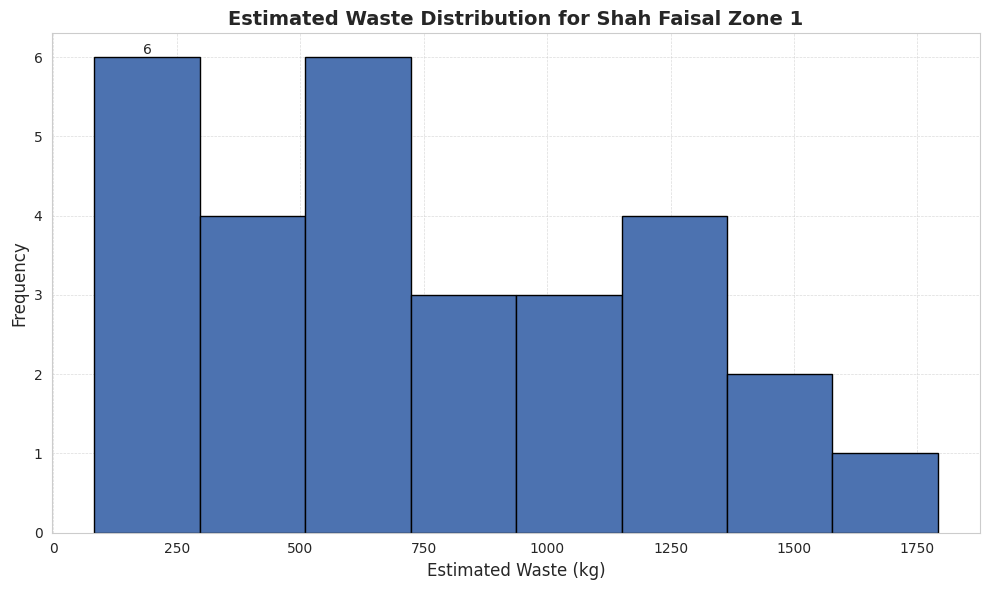

<ipython-input-40-1376399676>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


In [ ]:
sns.set_style("whitegrid")

for location ,df_zone in df_all.groupby("Location"):
  plt.figure(figsize=(10,6))
  counts, bins, patches = plt.hist(df_zone['Estimated Waste (kg)'], bins=8, color='#4c72b0', edgecolor='black')


  for count, bin_left, bin_right in zip(counts,bins[:-1],bins[1:]):
    bin_center=(bin_left+bin_right)/2
    plt.text(bin_center, count, str(int(count)), ha='center', va='bottom', fontsize=10,)

    plt.title(f"Estimated Waste Distribution for {location}", fontsize=14, weight="bold")
    plt.xlabel("Estimated Waste (kg)",fontsize=12)
    plt.ylabel("Frequency",fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


In [6]:
thresold=df_all["Estimated Waste (kg)"].median()
df_all["Estimated Label"]=df_all["Estimated Waste (kg)"].apply(lambda x :1 if x>thresold else 0)
df_all.head()

,Location,Animal Type,Quantity (Animals),Waste Type,Estimated Waste (kg),Collection Status,Remarks,Estimated Label
0,Shah Faisal Zone 5,Camel,26,Intestines,546.30,Pending,Need special vehicle,0
1,Shah Faisal Zone 4,Sheep,20,Intestines,300.80,Pending,Collection at 5 PM,0
2,Shah Faisal Zone 4,Goat,21,Blood & Internal,435.21,Collected,By private contractor,0
3,Shah Faisal Zone 5,Camel,16,Intestines,280.59,Pending,Need special vehicle,0
4,Shah Faisal Zone 2,Cow,6,Blood & Internal,216.86,Pending,Collected by Govt team,0


In [7]:
print("all distribution \n",df_all["Estimated Label"].value_counts())


all distribution 
 Estimated Label
0    100
1    100
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
features=['Location', 'Animal Type', 'Quantity (Animals)', 'Waste Type']
X=df_all[features].copy()
for col in ['Location', 'Animal Type', 'Waste Type']:
  X[col]=LabelEncoder().fit_transform(X[col])

# Add numeric column
X['Quantity (Animals)']=pd.to_numeric(X['Quantity (Animals)'],errors="coerce").fillna(0)

# Target variable
Y=df_all["Estimated Label"]
# Train-test split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=42)



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model

model=RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Make predictions
Y_pred=model.predict(X_test)

# Evaluate the model
accuracy=accuracy_score(Y_test, Y_pred)

print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\n📋 Classification Report:\n", classification_report(Y_test, Y_pred))

✅ Model Accuracy: 0.83

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.86      0.86      0.86        35

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [37]:
# Predict waste label on full dataset

df_all['Predicted_Waste_Label']=model.predict(X)

df_all['Predicted_Waste_Category']=df_all['Predicted_Waste_Label'].map({0:'Low Waste', 1:'High waste'})

print(df_all[['Location', 'Animal Type', 'Quantity (Animals)', 'Estimated Waste (kg)', 'Predicted_Waste_Category']].head(10))

             Location Animal Type  Quantity (Animals)  Estimated Waste (kg)  \
0  Shah Faisal Zone 5       Camel                  26                546.30   
1  Shah Faisal Zone 4       Sheep                  20                300.80   
2  Shah Faisal Zone 4        Goat                  21                435.21   
3  Shah Faisal Zone 5       Camel                  16                280.59   
4  Shah Faisal Zone 2         Cow                   6                216.86   
5  Shah Faisal Zone 5       Camel                  31               1133.85   
6  Shah Faisal Zone 4        Goat                  33               1017.54   
7  Shah Faisal Zone 3       Camel                  14                173.91   
8  Shah Faisal Zone 3       Camel                  49               1526.54   
9  Shah Faisal Zone 2         Cow                  43               1565.11   

  Predicted_Waste_Category  
0                Low Waste  
1                Low Waste  
2                Low Waste  
3             